Binary Text Classification Problem

Classifying tweets as disaster or non-disaster tweets
DataSource: https://www.kaggle.com/c/nlp-getting-started/data

Author: msb.nisha@gmail.com

In [118]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('.'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        break


.\.zip
.\.ipynb_checkpoints\CreateBot-checkpoint.ipynb
.\nlp_disastertweets\sample_submission.csv
.\nlp_disastertweets\modules\big.txt
.\nlp_disastertweets\modules\__pycache__\spell.cpython-38.pyc
.\wheels\certifi-2021.5.30-py2.py3-none-any.whl


In [119]:
#SpellCheck ??

In [120]:
#for text pre-processing
import re, string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('stopwords')
#for model-building
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix, precision_score, recall_score
from sklearn.metrics import roc_curve, auc, roc_auc_score
# bag of words
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
#for word embedding
import gensim
from gensim.models import Word2Vec

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\nmanicka\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\nmanicka\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\nmanicka\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nmanicka\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [148]:
train_data = pd.read_csv("./nlp_disastertweets/train.csv")

In [149]:
train_data.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [150]:
train_data.isna().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [151]:
len(train_data)

7613

In [152]:
train_data['location'].unique().tolist()[:5]
#TODO - clean up - special chars, possible feature derivation from the location 2k/7k has location

[nan,
 'Birmingham',
 'Est. September 2012 - Bristol',
 'AFRICA',
 'Philadelphia, PA']

In [153]:
#filtering only text and target first
train_data = train_data[['text', 'target']]

In [154]:
len(train_data)

7613

In [155]:
def clean_text(text):
    wnl = nltk.WordNetLemmatizer()
    ps = nltk.PorterStemmer()


    puncs = '!"#$%&\'()*+,-./:;<=>?[\\]^_`{|}~'
    
    text_nohyperlks = re.sub(r"\S*https?:\S*", "", text)
    text_twtmentions = " ".join(filter(lambda x:x[0]!='@', text_nohyperlks.split()))
    text_lc = "".join([word.lower() for word in text_twtmentions if word not in puncs]) # remove puntuation   
    text_rc = re.sub('[0-9]+', '', text_lc)
    text_rc = re.sub('[^0-9a-zA-Z]+', ' ', text_rc) #only alphanumeric
    
    tokens = re.split('\W+', text_rc)    # tokenization
    #words = [wnl.lemmatize(word) for word in tokens if word not in stopword]  # remove stopwords and lemmatizin
    #words = [ps.stem(word) for word in tokens if word not in stopword]   #remove stopwords and stemming
    words = [word for word in tokens if word not in stopword] 
    text = " ".join(words)
    return text

In [156]:
stopword = nltk.corpus.stopwords.words('english')
train_data['text_clean'] = train_data['text'].apply(lambda x: clean_text(x))
train_data.head()

,text,target,text_clean
0,Our Deeds are the Reason of this #earthquake M...,1,deeds reason earthquake may allah forgive us
1,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada
2,All residents asked to 'shelter in place' are ...,1,residents asked shelter place notified officer...
3,"13,000 people receive #wildfires evacuation or...",1,people receive wildfires evacuation orders ca...
4,Just got sent this photo from Ruby #Alaska as ...,1,got sent photo ruby alaska smoke wildfires pou...


In [157]:
#Drop duplicates 
train_data = train_data.drop_duplicates(subset=['text_clean'], keep='last')

In [158]:
len(train_data)

6825

In [56]:
#Spelling correction
#spell.correction('deed ')


def spellcheck_twt(twt):
    corrected =[]
    print("\nTweet: ", twt)
    for word in twt.split(" "):
        
        correct = spell.correction(word)
        corrected.append(correct)
    print(" ".join(corrected))
    return " ".join(corrected)
        
#print("Spelling corrected:", spellcheck_twt(train_data['text_clean'][0]))

train_data['text_spellcheck'] = train_data['text_clean'].apply(lambda x: spellcheck_twt(x))


Tweet:  deeds reason earthquake may allah forgive us
deeds reason earthquake may allah forgive us

Tweet:  forest fire near la ronge sask canada
forest fire near la range ask canada

Tweet:  residents asked shelter place notified officers evacuation shelter place orders expected
residents asked shelter place notified officers evacuation shelter place orders expected

Tweet:   people receive wildfires evacuation orders california
a people receive wildfires evacuation orders california

Tweet:  got sent photo ruby alaska smoke wildfires pours school
got sent photo ruby alaska smoke wildfires hours school

Tweet:  rockyfire update california hwy closed directions due lake county fire cafire wildfires
rockyfire update california why closed directions due lake county fire fire wildfires

Tweet:  flood disaster heavy rain causes flash flooding streets manitou colorado springs areas
flood disaster heavy rain causes flash flooding streets monitor colorado springs areas

Tweet:  im top hill se

truckcrash overtures fortworth interstate click you

Tweet:  accident ashville us sb sr traffic
accident nashville us s s traffic

Tweet:  carolina accident motorcyclist dies crash car crossed median motorcycle rider traveling
carolina accident motorcyclist dies crash car crossed median motorcycle rider traveling

Tweet:  fyi cadfyi accident property damagenhs piner rdhorndale dr
foi cady accident property damages pine rdhorndale dr

Tweet:  rt naayf first accident years turning onto chandanee magu near mma taxi rammed halfway turned everyone conf 
it navy first accident years turning onto chandanee may near ma taxi jammed halfway turned everyone cone a

Tweet:  accident left lane blocked manchester rt nb eddy rd stop go traffic back nha delay mins traffic
accident left lane blocked manchester it no eddy rd stop go traffic back ha delay mind traffic

Tweet:  accident property damage piner rdhorndale dr
accident property damage pine rdhorndale dr

Tweet:   accident
a accident

Tweet:  f

a nice fletcher one victim crashed airplane times ago accident left little bit trauma although she a

Tweet:  omg horrible accident man died wings airplane
org horrible accident man died wings airplane

Tweet:  omg dont believe rip bro airplane accident jetengine turbojet boing g
org dont believe rip brow airplane accident jetengine turbojet being g

Tweet:  experts france begin examining airplane debris found reunion island french air accident experts wednesday began examining
experts france begin examining airplane debris found reunion island french air accident experts wednesday began examining

Tweet:  airplane accident
airplane accident

Tweet:  phone looks like car ship airplane accident terrible
phone looks like car ship airplane accident terrible

Tweet:  statistically im risk getting killed cop dying airplane accident
statistical in risk getting killed cop dying airplane accident

Tweet:  airplane crashes house colombia people die accident
airplane clashes house colombia peopl

ok want completely fortnight may also food coma bc kebabtahinipickles also annihilated series

Tweet:  fun filled happyhour simmons bar camden handsome one got annihilated apart game
fun filled happyhour summons bar camden handsome one got annihilated apart game

Tweet:  juanny beisbol sr annihilated ball lgm
funny bristol s annihilated ball him

Tweet:  hell fraction belief total annihilation destruction usa
hell fraction belief total annihilating destruction us

Tweet:  maybe call israel tell sorry pres sold river annihilation
maybe call israel tell sorry press sold river annihilating

Tweet:  evildead annihilation civilization
evildead annihilating civilization

Tweet:  annihilating quarterstaff annihilation
annihilating quarterstaff annihilating

Tweet:  starmade stardate planetary annihilation via
starmade stardate plantar annihilating via

Tweet:  please sign share petition save wild horses arizona 
please sign share petition save wild horses arizona a

Tweet:  please check salt 

KeyboardInterrupt: 

In [159]:
len(train_data)

6825

(-0.5, 399.5, 199.5, -0.5)

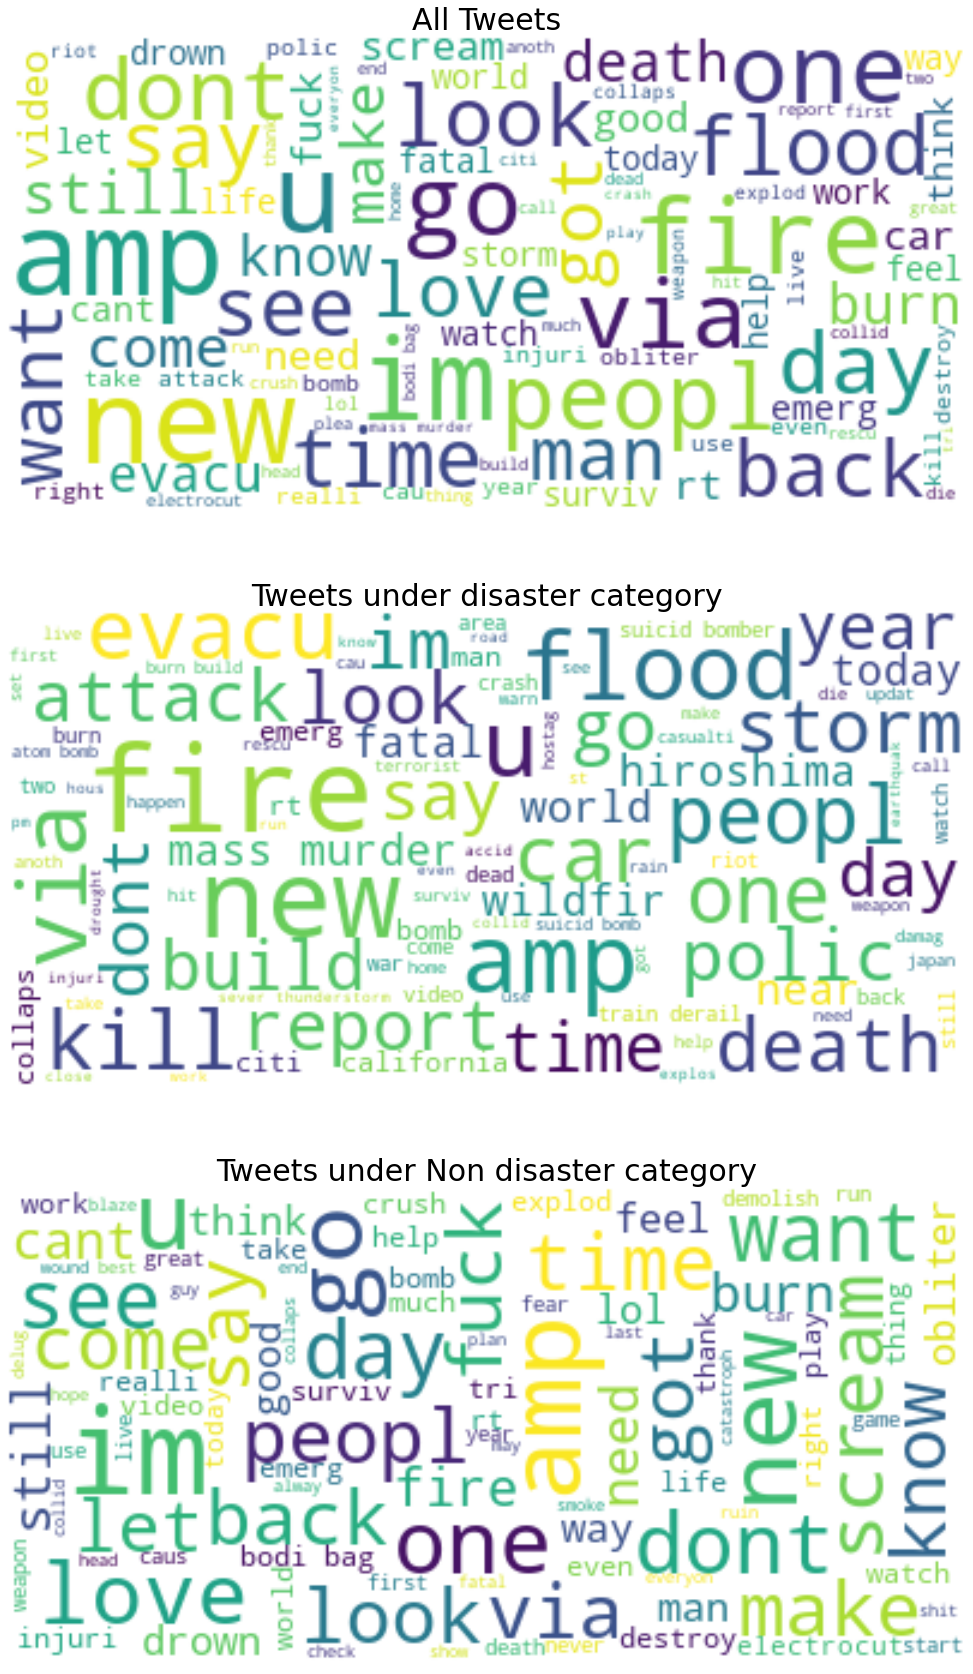

In [273]:

from wordcloud import WordCloud, STOPWORDS , ImageColorGenerator
import matplotlib.pyplot as plt

df = pd.DataFrame(train_data[['text_clean', 'target']])
# Start with one review:
df_disaster = train_data[train_data['target']==1]
df_na = train_data[train_data['target']==0]
tweet_All = " ".join(review for review in df['text_clean'])
tweet_disaster = " ".join(review for review in df_disaster['text_clean'])
tweet_NA = " ".join(review for review in df_na['text_clean'])

fig, ax = plt.subplots(3, 1, figsize  = (30,30))
# Create and generate a word cloud image:
wordcloud_ALL = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(tweet_All)
wordcloud_disaster = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(tweet_disaster)
wordcloud_NA = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(tweet_NA)

# Display the generated image:
ax[0].imshow(wordcloud_ALL, interpolation='bilinear')
ax[0].set_title('All Tweets', fontsize=30)
ax[0].axis('off')
ax[1].imshow(wordcloud_disaster, interpolation='bilinear')
ax[1].set_title('Tweets under disaster category',fontsize=30)
ax[1].axis('off')
ax[2].imshow(wordcloud_NA, interpolation='bilinear')
ax[2].set_title('Tweets under Non disaster category',fontsize=30)
ax[2].axis('off')

In [160]:
#SPLITTING THE TRAINING DATASET INTO TRAIN AND TEST
X_train, X_test, y_train, y_test = train_test_split(train_data["text_clean"],train_data["target"],test_size=0.2,shuffle=True)


In [161]:
#Step 1: train-test split
X = train_data['text'] 
#the column text contains textual data to extract features from.
y = train_data['target'] 
#this is the column we are learning to predict.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
#split X and y into training and testing sets. By default, 
#it splits 75% #training and 25% test. random_state=1 for reproducibility.

#Step 2-3: Pre-process and Vectorize train and test data
vect = CountVectorizer(preprocessor=clean_text)#, max_features = 5000) 
#clean is a function we defined for pre-processing, seen in the notebook.
X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)
print(X_train_dtm.shape, X_test_dtm.shape)

nb = MultinomialNB() #instantiate a Multinomial Naive Bayes classifier
nb.fit(X_train_dtm, y_train)#train the mode 
y_pred_class = nb.predict(X_test_dtm)#make class predictions for test data

#make class predictions for X_test_dtm
print("Accuracy: ", accuracy_score(y_test, y_pred_class))

print(f1_score(y_test, y_pred_class, average='macro')) 

print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred_class))
cm_results =confusion_matrix(y_test, y_pred_class)

print( "correct predictions : TP, TN = " ,cm_results[0][0] + cm_results[1][1])
print( "wrong predictions: FN, FP = " , cm_results[0][1]+cm_results[1][0])

(5118, 12227) (1707, 12227)
Accuracy:  0.7809021675454013
0.7699162438011763
Confusion Matrix: 
 [[853 148]
 [226 480]]
correct predictions : TP, TN =  1333
wrong predictions: FN, FP =  374


In [162]:
print(len(y_test))
print( "correct ones : TP, TN = " ,885 + 478)
print( "wrong ones: FN, FP = " , 221+120)

train_data['target'].value_counts()

1707
correct ones : TP, TN =  1363
wrong ones: FN, FP =  341


0    4047
1    2778
Name: target, dtype: int64

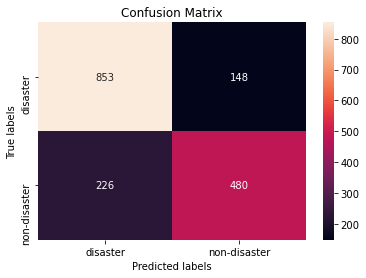

In [163]:
#VISUALIZATION
import seaborn as sns
import matplotlib.pyplot as plt     

cm = confusion_matrix(y_test, y_pred_class)
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['disaster', 'non-disaster']); ax.yaxis.set_ticklabels(['disaster','non-disaster']);


In [ ]:
#SUBMISSION
test_data = pd.read_csv("./nlp_disastertweets/test.csv")
test_data['text_clean'] = test_data['text'].apply(lambda x: clean_text(x))
test_dtm = vect.transform(test_data['text_clean'])
#print(test_dtm.shape)


y_pred_class = nb.predict(test_dtm)
submission_df = pd.read_csv("./nlp_disastertweets/sample_submission.csv")
#submission_df.head(3)

submission_df['id'] = test_data['id'].tolist()
submission_df['target'] = y_pred_class


#submission_df.head()
submission_df.to_csv("./nlp_disastertweets/submission02.csv", index=False)

In [109]:
#LOGISTIC REGRESSION MODEL
from sklearn.linear_model import LogisticRegression 
logreg = LogisticRegression(class_weight="balanced")
logreg.fit(X_train_dtm, y_train) 
y_pred_class = logreg.predict(X_test_dtm)
print("Accuracy: ", accuracy_score(y_test, y_pred_class))
print("F1 Score: ", f1_score(y_test, y_pred_class, average='macro')) 
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_class))
cm_results =confusion_matrix(y_test, y_pred_class)

print( "correct predictions : TP, TN = " ,cm_results[0][0] + cm_results[1][1])
print( "wrong predictions: FN, FP = " , cm_results[0][1]+cm_results[1][0])

Accuracy:  0.7881455399061033
F1 Score:  0.7777221309831596
Confusion Matrix:
 [[856 149]
 [212 487]]
correct predictions : TP, TN =  1343
wrong predictions: FN, FP =  361


In [112]:
#
from sklearn.svm import LinearSVC
vect = CountVectorizer(preprocessor=clean_text, max_features=1000) #Step-1
X_train_dtm = vect.fit_transform(X_train)#combined step 2 and 3
X_test_dtm = vect.transform(X_test)
classifier = LinearSVC(class_weight='balanced') #notice the “balanced” option
classifier.fit(X_train_dtm, y_train) #fit the model with training data
y_pred_class = classifier.predict(X_test_dtm)
print("Accuracy: ", accuracy_score(y_test, y_pred_class))
print("F1 Score: ", f1_score(y_test, y_pred_class, average='macro')) 
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_class))

cm_results =confusion_matrix(y_test, y_pred_class)

print( "correct predictions : TP, TN = " ,cm_results[0][0] + cm_results[1][1])
print( "wrong predictions: FN, FP = " , cm_results[0][1]+cm_results[1][0])

Accuracy:  0.7593896713615024
F1 Score:  0.7514797951052932
Confusion Matrix:
 [[799 206]
 [204 495]]
correct predictions : TP, TN =  1294
wrong predictions: FN, FP =  410
